In [5]:
import pandas as pd

disease = pd.read_csv('/Users/sihoon/Downloads/IA_report_dy.csv')
disease = disease.drop(columns=['Group'])
Disease_Count = disease['SubjectID'].value_counts()
disease['Count'] = disease['SubjectID'].map(Disease_Count)

#disease = disease[disease['SubjectID'] != 'eki26']

normal = pd.read_csv('/Users/sihoon/Downloads/IA_report_nor.csv')
normal = normal.drop(columns=['Group'])
Nomal_Count = normal['SubjectID'].value_counts()
normal['Count'] = normal['SubjectID'].map(Nomal_Count)

In [6]:
disease['Count'].value_counts()

Count
193    1351
189    1134
187    1122
196     980
191     573
190     570
182     546
179     537
203     406
198     396
188     376
185     370
184     368
183     366
169     338
197     197
194     194
192     192
186     186
181     181
178     178
177     177
174     174
167     167
166     166
164     164
161     161
152     152
144     144
141     141
139     139
110     110
95       95
90       90
88       88
84       84
28       28
Name: count, dtype: int64

In [7]:
normal['Count'].value_counts()

Count
180    2160
179    2148
181    1991
191    1910
171    1539
190    1520
188    1504
184    1288
182    1274
176    1232
169    1183
187    1122
183    1098
177    1062
175    1050
173    1038
195     975
193     965
189     945
185     925
178     890
172     860
194     776
186     744
174     696
198     594
196     588
192     576
168     504
163     489
197     394
160     320
208     208
207     207
205     205
199     199
170     170
167     167
166     166
164     164
161     161
159     159
157     157
153     153
152     152
151     151
150     150
146     146
145     145
144     144
137     137
132     132
124     124
117     117
105     105
96       96
Name: count, dtype: int64

In [8]:
disease_temp = disease.set_index('SubjectID')
normal_temp = normal.set_index('SubjectID')

disease_SubjectID = disease['SubjectID']
normal_SubjectID = normal['SubjectID']

In [9]:
from sklearn.preprocessing import MinMaxScaler

minmax_scaler = MinMaxScaler()

# 데이터 정규화
disease_scale = minmax_scaler.fit_transform(disease_temp)
normal_scale = minmax_scaler.fit_transform(normal_temp)

In [10]:
# 컬럼 삽입

disease_scale = pd.DataFrame(disease_scale, columns=disease.columns[1:])
disease_scale = disease_scale.join(disease_SubjectID, how='outer')

normal_scale = pd.DataFrame(normal_scale, columns=disease.columns[1:])
normal_scale = normal_scale.join(normal_SubjectID, how='outer')

# 컬럼을 인덱스화
disease_scale.set_index('SubjectID', inplace=True)
normal.set_index('SubjectID', inplace=True)

# 스케일링 된 disease
disease_scale

,Sentence_ID,Word_Number,QUESTION_ACCURACY,FIXATION_COUNT,SKIP,TOTAL_READING_TIME,FIRST_FIXATION_DURATION,FIRST_FIXATION_X,FIRST_FIXATION_Y,FIRST_RUN_TOTAL_READING_TIME,FIRST_SACCADE_AMPLITUDE,REGRESSION_IN,REGRESSION_OUT,REGRESSION_OUT_FULL,REGRESSION_PATH_DURATION,Count
SubjectID,,,,,,,,,,,,,,,,
ake05,0.000000,0.125,1.0,0.063830,0.0,0.065499,0.117197,0.064792,0.871444,0.031970,0.028990,1.0,1.0,1.0,0.018148,0.937143
ake05,0.000000,0.250,1.0,0.021277,0.0,0.027371,0.054181,0.122532,0.855638,0.014780,0.041414,0.0,1.0,1.0,0.022377,0.937143
ake05,0.000000,0.375,1.0,0.042553,0.0,0.104372,0.308893,0.185757,0.840885,0.157764,0.049379,0.0,0.0,0.0,0.041992,0.937143
ake05,0.000000,0.500,1.0,0.170213,0.0,0.245221,0.212309,0.307349,0.866175,0.113503,0.033450,0.0,0.0,0.0,0.099068,0.937143
ake05,0.000000,0.625,1.0,0.000000,0.0,0.028649,0.159600,0.492792,0.892518,0.043538,0.057662,0.0,0.0,0.0,0.011307,0.937143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zrs09,0.965517,0.625,1.0,0.085106,0.0,0.078226,0.070671,0.535490,0.873551,0.047313,0.104492,0.0,1.0,1.0,0.055328,0.760000
zrs09,1.000000,0.250,0.0,0.000000,0.0,0.007668,0.043581,0.203306,0.616438,0.011889,0.032494,0.0,0.0,0.0,0.002805,0.760000
zrs09,1.000000,0.375,0.0,0.042553,0.0,0.037116,0.060660,0.373864,0.799789,0.016548,0.107996,1.0,0.0,0.0,0.004057,0.760000


In [11]:
disease_scale['Count'].value_counts()

Count
0.942857    1351
0.920000    1134
0.908571    1122
0.960000     980
0.931429     573
0.925714     570
0.880000     546
0.862857     537
1.000000     406
0.971429     396
0.914286     376
0.897143     370
0.891429     368
0.885714     366
0.805714     338
0.965714     197
0.948571     194
0.937143     192
0.902857     186
0.874286     181
0.857143     178
0.851429     177
0.834286     174
0.794286     167
0.788571     166
0.777143     164
0.760000     161
0.708571     152
0.662857     144
0.645714     141
0.634286     139
0.468571     110
0.382857      95
0.354286      90
0.342857      88
0.320000      84
0.000000      28
Name: count, dtype: int64

In [12]:
normal_scale['Count'].value_counts()

Count
0.750000    2160
0.741071    2148
0.758929    1991
0.848214    1910
0.669643    1539
0.839286    1520
0.821429    1504
0.785714    1288
0.767857    1274
0.714286    1232
0.651786    1183
0.812500    1122
0.776786    1098
0.723214    1062
0.705357    1050
0.687500    1038
0.883929     975
0.866071     965
0.830357     945
0.794643     925
0.732143     890
0.678571     860
0.875000     776
0.803571     744
0.696429     696
0.910714     594
0.892857     588
0.857143     576
0.642857     504
0.598214     489
0.901786     394
0.571429     320
1.000000     208
0.991071     207
0.973214     205
0.919643     199
0.660714     170
0.633929     167
0.625000     166
0.607143     164
0.580357     161
0.562500     159
0.544643     157
0.508929     153
0.500000     152
0.491071     151
0.482143     150
0.446429     146
0.437500     145
0.428571     144
0.366071     137
0.321429     132
0.250000     124
0.187500     117
0.080357     105
0.000000      96
Name: count, dtype: int64

In [13]:
disease_df = pd.DataFrame(disease_scale)
normal_df = pd.DataFrame(normal_scale)

# groupby로 그룹핑
disease_df = disease_df.groupby(['SubjectID', 'Sentence_ID', 'Word_Number']).mean()
normal_df = normal_df.groupby(['SubjectID', 'Sentence_ID', 'Word_Number']).mean()

disease_df

QUESTION_ACCURACY  FIXATION_COUNT  SKIP  \
SubjectID Sentence_ID Word_Number                                            
ake05     0.000000    0.125                      1.0        0.063830   0.0   
                      0.250                      1.0        0.021277   0.0   
                      0.375                      1.0        0.042553   0.0   
                      0.500                      1.0        0.170213   0.0   
                      0.625                      1.0        0.000000   0.0   
...                                              ...             ...   ...   
zrs09     0.965517    0.625                      1.0        0.085106   0.0   
          1.000000    0.250                      0.0        0.000000   0.0   
                      0.375                      0.0        0.042553   0.0   
                      0.500                      0.0        0.127660   0.0   
                      0.625                      0.0        0.000000   0.0   

                                   TOTAL_READING_TIME  \
SubjectID Sentence_ID Word_Number                       
ake05     0.000000    0.125                  0.065499   
                      0.250                  0.027371   
                      0.375                  0.104372   
                      0.500                  0.245221   
                      0.625                  0.028649   
...                                               ...   
zrs09     0.965517    0.625                  0.078226   
          1.000000    0.250                  0.007668   
                      0.375                  0.037116   
                      0.500                  0.076841   
                      0.625                  0.008307   

                                   FIRST_FIXATION_DURATION  FIRST_FIXATION_X  \
SubjectID Sentence_ID Word_Number                                              
ake05     0.000000    0.125                       0.117197          0.064792   
                      0.250                       0.054181          0.122532   
                      0.375                       0.308893          0.185757   
                      0.500                       0.212309          0.307349   
                      0.625                       0.159600          0.492792   
...                                                    ...               ...   
zrs09     0.965517    0.625                       0.070671          0.535490   
          1.000000    0.250                       0.043581          0.203306   
                      0.375                       0.060660          0.373864   
                      0.500                       0.073322          0.497806   
                      0.625                       0.047114          0.680743   

                                   FIRST_FIXATION_Y  \
SubjectID Sentence_ID Word_Number                     
ake05     0.000000    0.125                0.871444   
                      0.250                0.855638   
                      0.375                0.840885   
                      0.500                0.866175   
                      0.625                0.892518   
...                                             ...   
zrs09     0.965517    0.625                0.873551   
          1.000000    0.250                0.616438   
                      0.375                0.799789   
                      0.500                0.766070   
                      0.625                0.691254   

                                   FIRST_RUN_TOTAL_READING_TIME  \
SubjectID Sentence_ID Word_Number                                 
ake05     0.000000    0.125                            0.031970   
                      0.250                            0.014780   
                      0.375                            0.157764   
                      0.500                            0.113503   
                      0.625                            0.043538   
...                                                 

In [14]:
disease_df.describe()

,QUESTION_ACCURACY,FIXATION_COUNT,SKIP,TOTAL_READING_TIME,FIRST_FIXATION_DURATION,FIRST_FIXATION_X,FIRST_FIXATION_Y,FIRST_RUN_TOTAL_READING_TIME,FIRST_SACCADE_AMPLITUDE,REGRESSION_IN,REGRESSION_OUT,REGRESSION_OUT_FULL,REGRESSION_PATH_DURATION,Count
count,12641.000000,12641.000000,12641.00000,12641.000000,12641.000000,12641.000000,12641.000000,12641.000000,12641.000000,12641.000000,12641.000000,12641.000000,12641.000000,12641.000000
mean,0.299976,0.068075,0.05498,0.072339,0.088950,0.415635,0.544687,0.074987,0.054850,0.179891,0.181948,0.221501,0.031535,0.876105
std,0.443661,0.077039,0.22795,0.074637,0.059726,0.219051,0.203479,0.081150,0.056732,0.384112,0.385817,0.415274,0.045230,0.127903
min,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.021277,0.00000,0.025667,0.048881,0.224694,0.409905,0.024179,0.027716,0.000000,0.000000,0.000000,0.009344,0.874286
50%,0.000000,0.042553,0.00000,0.048991,0.071849,0.407709,0.550053,0.047393,0.044282,0.000000,0.000000,0.000000,0.018817,0.914286
75%,1.000000,0.085106,0.00000,0.092923,0.112485,0.589940,0.685985,0.095188,0.065945,0.000000,0.000000,0.000000,0.037892,0.942857
max,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [15]:
normal_df.describe()

,QUESTION_ACCURACY,FIXATION_COUNT,SKIP,TOTAL_READING_TIME,FIRST_FIXATION_DURATION,FIRST_FIXATION_X,FIRST_FIXATION_Y,FIRST_RUN_TOTAL_READING_TIME,FIRST_SACCADE_AMPLITUDE,REGRESSION_IN,REGRESSION_OUT,REGRESSION_OUT_FULL,REGRESSION_PATH_DURATION,Count
count,38075.000000,38075.000000,38075.000000,38075.000000,38075.000000,38075.000000,38075.000000,38075.000000,38075.000000,38075.000000,38075.000000,38075.000000,38075.000000,38075.000000
mean,0.305634,0.042337,0.049665,0.044419,0.101822,0.412473,0.512153,0.042413,0.048930,0.193933,0.188943,0.234222,0.010072,0.750399
std,0.450914,0.057660,0.217255,0.049454,0.067362,0.208703,0.063043,0.046661,0.037809,0.395382,0.391468,0.423517,0.015165,0.122131
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.016810,0.063038,0.230531,0.474844,0.016610,0.028964,0.000000,0.000000,0.000000,0.003258,0.696429
50%,0.000000,0.019231,0.000000,0.029203,0.085356,0.408188,0.510388,0.027786,0.042072,0.000000,0.000000,0.000000,0.005789,0.758929
75%,1.000000,0.057692,0.000000,0.052840,0.121378,0.579802,0.548436,0.048820,0.059619,0.000000,0.000000,0.000000,0.011336,0.830357
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


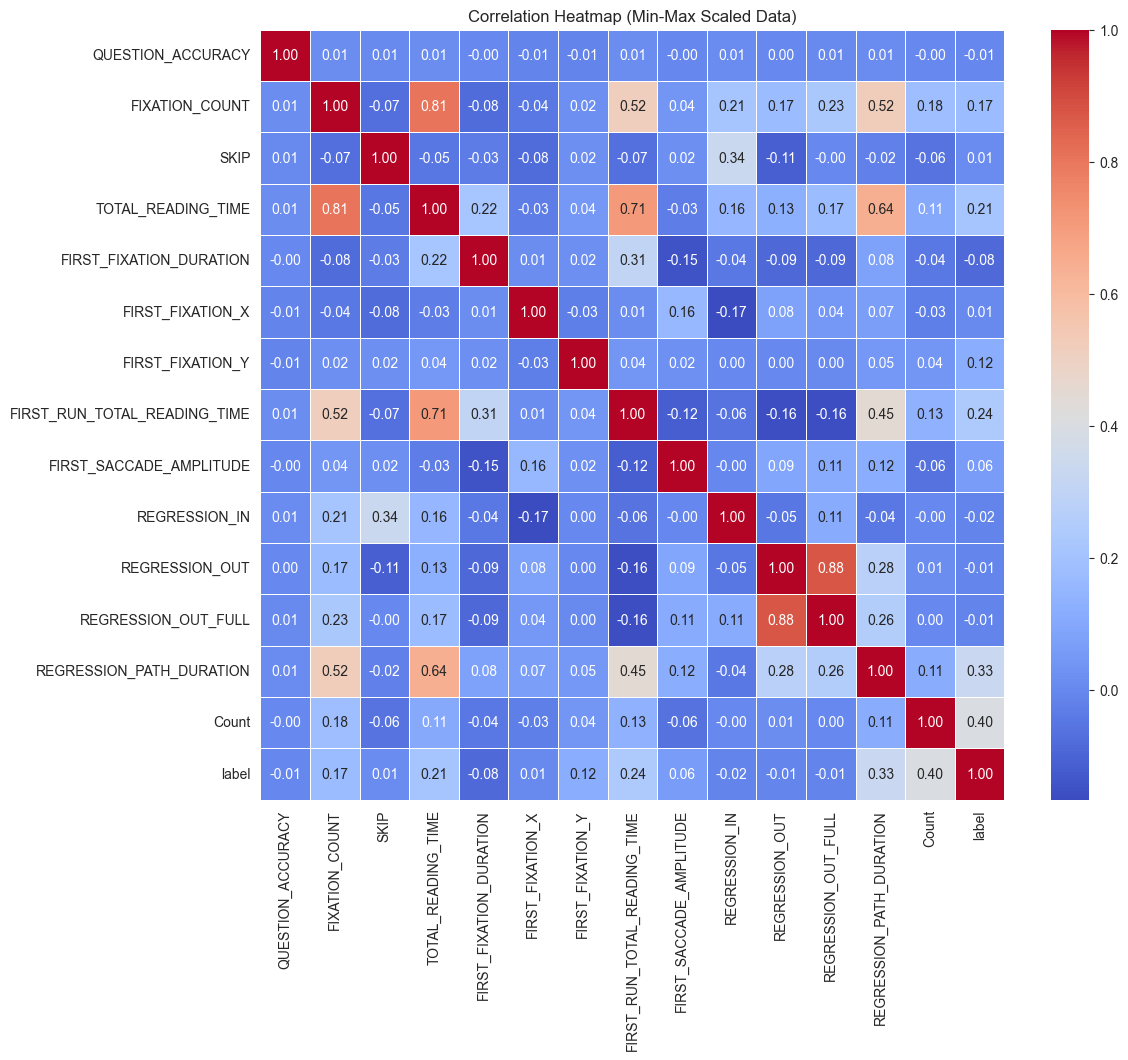

In [16]:
import numpy as np
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# 질병인과 정상인에 대한 레이블 생성
disease_df['label'] = 1
normal_df['label'] = 0

# 합쳐진 Min-Max 스케일링된 데이터
data = pd.concat([disease_df, normal_df], axis=0)

# 피처 간의 상관관계 계산
correlation = data.corr()

# 히트맵 시각화
plt.figure(figsize=(12, 10))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Heatmap (Min-Max Scaled Data)')
plt.show()

In [17]:
data

QUESTION_ACCURACY  FIXATION_COUNT  SKIP  \
SubjectID   Sentence_ID Word_Number                                            
ake05       0.000000    0.125                      1.0        0.063830   0.0   
                        0.250                      1.0        0.021277   0.0   
                        0.375                      1.0        0.042553   0.0   
                        0.500                      1.0        0.170213   0.0   
                        0.625                      1.0        0.000000   0.0   
...                                                ...             ...   ...   
varya_norm1 0.965517    0.500                      1.0        0.000000   0.0   
                        0.625                      1.0        0.038462   0.0   
            1.000000    0.250                      0.0        0.019231   0.0   
                        0.375                      0.0        0.096154   0.0   
                        0.500                      0.0        0.076923   0.0   

                                     TOTAL_READING_TIME  \
SubjectID   Sentence_ID Word_Number                       
ake05       0.000000    0.125                  0.065499   
                        0.250                  0.027371   
                        0.375                  0.104372   
                        0.500                  0.245221   
                        0.625                  0.028649   
...                                                 ...   
varya_norm1 0.965517    0.500                  0.012737   
                        0.625                  0.079231   
            1.000000    0.250                  0.061905   
                        0.375                  0.148365   
                        0.500                  0.070166   

                                     FIRST_FIXATION_DURATION  \
SubjectID   Sentence_ID Word_Number                            
ake05       0.000000    0.125                       0.117197   
                        0.250                       0.054181   
                        0.375                       0.308893   
                        0.500                       0.212309   
                        0.625                       0.159600   
...                                                      ...   
varya_norm1 0.965517    0.500                       0.093970   
                        0.625                       0.209475   
            1.000000    0.250                       0.228269   
                        0.375                       0.394283   
                        0.500                       0.219264   

                                     FIRST_FIXATION_X  FIRST_FIXATION_Y  \
SubjectID   Sentence_ID Word_Number                                       
ake05       0.000000    0.125                0.064792          0.871444   
                        0.250                0.122532          0.855638   
                        0.375                0.185757          0.840885   
                        0.500                0.307349          0.866175   
                        0.625                0.492792          0.892518   
...                                               ...               ...   
varya_norm1 0.965517    0.500                0.481305          0.564205   
                        0.625                0.499433          0.573217   
            1.000000    0.250                0.233477          0.516145   
                        0.375                0.303875          0.496370   
                        0.500                0.467558          0.498623   

                                     FIRST_RUN_TOTAL_READING_TIME  \
SubjectID   Sentence_ID Word_Number                                 
ake05       0.000000    0.125                            0.031970   
                        0.250                            0.014780   
                        0.375                            0.157764   
                        0.500                            0.113503   
     

In [18]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
#data = data.drop(columns=['SKIP', 'FIRST_FIXATION_X', 'REGRESSION_OUT', 'REGRESSION_OUT_FULL'])

X = data.drop('label', axis=1)
y = data['label']

# 데이터를 학습 데이터와 테스트 데이터로 나누기
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 학습 데이터에 대해 스케일링 수행
X_train_scaled = minmax_scaler.fit_transform(X_train)

# 테스트 데이터에 대해 학습 데이터의 스케일을 그대로 적용
X_test_scaled = minmax_scaler.transform(X_test)

In [19]:
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline

In [20]:
# scaler = MinMaxScaler()
# svm_model = SVC()
#
# param_dist = {
#     'C': [0.1, 1, 10],
#     'kernel': ['linear', 'rbf']
# }
# # 랜덤 서치 객체 생성
# random_search = RandomizedSearchCV(
#     svm_model, param_distributions=param_dist, n_iter=10, cv=5, scoring='accuracy', random_state=42
# )
# # 데이터 전처리 후 랜덤 서치 수행
# X_train_scaled = scaler.fit_transform(X_train)
# random_search.fit(X_train_scaled, y_train)
#
# # 최적의 하이퍼파라미터 출력
# print("Best Parameters: ", random_search.best_params_)

/Users/sihoon/PycharmProjects/pythonProject2/venv/lib/python3.11/site-packages/sklearn/model_selection/_search.py:307: UserWarning: The total space of parameters 6 is smaller than n_iter=10. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best Parameters:  {'kernel': 'rbf', 'C': 10}


In [21]:
scaler = MinMaxScaler()
svm_model = SVC(kernel='rbf', C=10)

# 파이프라인 구성 (데이터 스케일링 후 SVM 모델 적용)
pipeline = make_pipeline(scaler, svm_model)

# 교차 검증 수행 (5-fold 교차 검증 예시)
cv_scores = cross_val_score(pipeline, X, y, cv=5, scoring='accuracy')

# 각 폴드의 정확도 출력
print("각 폴드의 정확도:", cv_scores)

# 평균 정확도 계산
mean_accuracy = np.mean(cv_scores)
print("평균 정확도:", mean_accuracy)

각 폴드의 정확도: [0.94923107 0.91876171 0.94824017 0.95257813 0.91994479]
평균 정확도: 0.9377511735961243


In [22]:
# svm_model = SVC(kernel='rbf', C=10)
# svm_model.fit(X_train, y_train)
#
# y_pred = svm_model.predict(X_test)
#
# accuracy = accuracy_score(y_test, y_pred)
# print(f'Accuracy: {accuracy}')

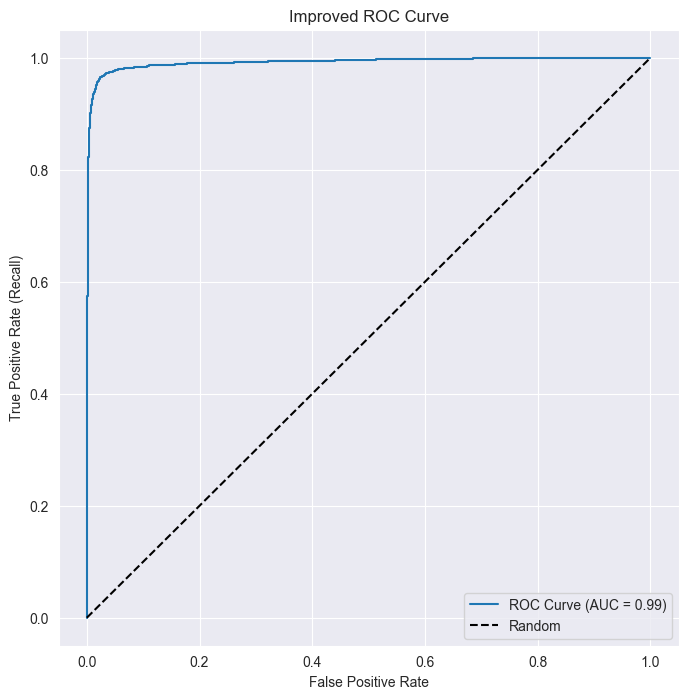

In [23]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
import matplotlib.pyplot as plt

# 특성 스케일링
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

svm_model = SVC(kernel='rbf', C=10, probability=True)
svm_model.fit(X_train_scaled, y_train)

# 테스트 데이터에 대한 예측 확률 얻기
y_scores = svm_model.decision_function(X_test_scaled)

# ROC curve 계산
fpr, tpr, thresholds = roc_curve(y_test, y_scores)

# ROC AUC 값 계산
roc_auc = auc(fpr, tpr)

# ROC 곡선 그리기
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('Improved ROC Curve')
plt.legend()
plt.show()


In [24]:
print(roc_auc)

0.9917533333664006


AUC의 해석은 다음과 같습니다:

AUC = 0.5: 모델이 무작위로 예측하는 경우와 같음 (성능이 나쁨)
0.5 < AUC < 1.0: 모델이 얼마나 잘 분류되는지에 대한 정도를 나타냄
AUC가 1에 가까울수록 좋은 성능을 나타냄
AUC가 0.5보다 크면 모델이 양성 및 음성 샘플을 잘 분류하고 있음
AUC가 0.7 이상이면 어느 정도 좋은 모델로 간주될 수 있음
AUC가 0.8 이상이면 매우 좋은 모델로 간주될 수 있음
AUC가 0.9 이상이면 우수한 모델로 간주될 수 있음

이진 분류에서 클래스 간의 불균형이나 모델의 예측이 매우 확신적으로 이루어질 때 나타날 수 있습니다.
